In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [106]:
# Load in sensitivity analysis data
with open("sensitivity_ratio_high.pkl", "rb") as fid:
    ratio_high = pickle.load(fid)
    
with open("sensitivity_ratio_low.pkl", "rb") as fid:
    ratio_low = pickle.load(fid)

with open("sensitivity_pop_high.pkl", "rb") as fid:
    population_high = pickle.load(fid)
    
with open("sensitivity_pop_low.pkl", "rb") as fid:
    popultion_low = pickle.load(fid)
    
with open("sensitivity_mut_high.pkl", "rb") as fid:
    mut_high = pickle.load(fid)
    
with open("sensitivity_mut_low.pkl", "rb") as fid:
    mut_low = pickle.load(fid)

with open("sensitivity_cov_high.pkl", "rb") as fid:
    cov_high = pickle.load(fid)
    
with open("sensitivity_cov_low.pkl", "rb") as fid:
    cov_low = pickle.load(fid)

In [107]:
# Build initial dataframe
df = pd.DataFrame({"Higher Ratio" : ratio_high, "Lower Ratio" : ratio_low,
                  "Higher Population" : population_high, "Smaller Population" : population_low,
                  "Higher Mutation" : mut_high, "Lower Mutation" : mut_low,
                  "Higher Crossover" : cov_high, "Lower Crossover" : cov_low})

In [108]:
# Melt data frame into stacked columns
melted = pd.melt(df)
melted
melted = melted.rename(columns={"value": "Convergence", "variable": "Type"})

# Add columns for type of change and hyperparameter
changes = ["Increase","Decrease","Increase","Decrease","Increase","Decrease","Increase","Decrease"]
melted['Change'] = np.repeat(changes,50)
hyperparameter = ["Ratio","Population","Mutation","Crossover"]
melted['Groups'] = np.repeat(hyperparameter,100)

In [109]:
melted[melted["Convergence"] == 0]
len(melted)
melted["Color"] = "Black"
melted["Color"][257] = "Red"
melted["Color"][257]

/var/folders/dq/l6b0fqxj5l3gxwhr77nrn9k40000gn/T/ipykernel_84788/1301484333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melted["Color"][257] = "Red"


'Red'

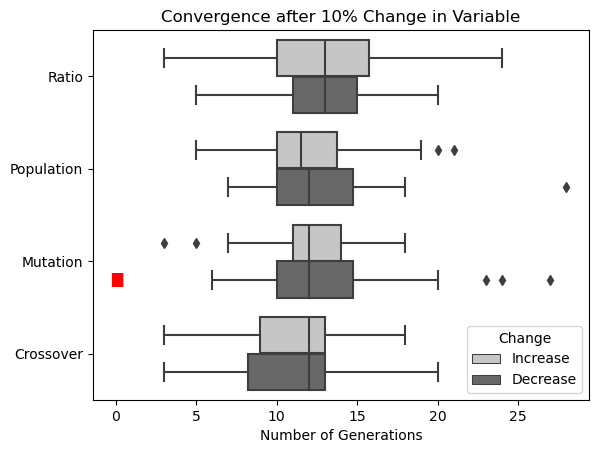

In [110]:
sns.boxplot(data=melted, x="Convergence", y="Groups", hue="Change", palette = "Greys").set(xlabel = 'Number of Generations',ylabel='',title='Convergence after 10% Change in Variable')
plt.text(-1, 1.95,'.', ha='left', va='center', color = "Red", fontsize = 80)
plt.savefig("Sensitivity Analysis", bbox_inches = "tight")

## Comparing Optimizers

In [111]:
# Load in data from testing the settings on 100 seeds
with open("Robust_inhib_avg_varied_pop.pkl", "rb") as fid:
    mut_cov = pickle.load(fid)
    
with open("Robust_inhib_full_pop.pkl", "rb") as fid:
    pop_size = pickle.load(fid)

with open("Robust_inhib_ratio.pkl", "rb") as fid:
    pop_ratio = pickle.load(fid)


df = pd.DataFrame({"Mutation and Crossover" : mut_cov, "+ Population Size" : pop_size,
                  "+ Population Composition" : pop_ratio})
df

,Mutation and Crossover,+ Population Size,+ Population Composition
0,12,7,10
1,20,17,20
2,12,11,4
3,19,16,15
4,19,15,16
...,...,...,...
95,18,12,10
96,17,16,12
97,16,16,6
98,8,16,10


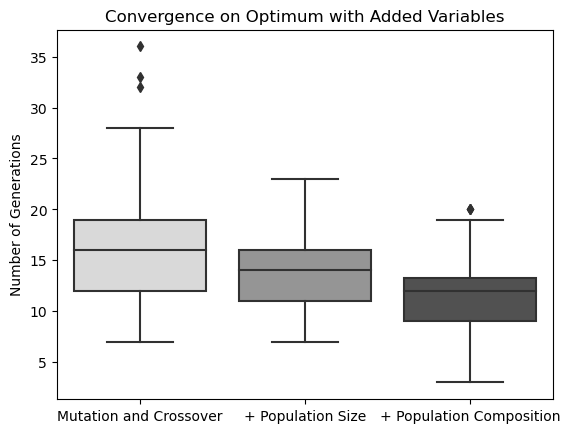

In [112]:
# sns.boxplot(df, palette = sns.cubehelix_palette(dark = 0))
sns.boxplot(df, palette = "Greys")
plt.title("Convergence on Optimum with Added Variables")
plt.ylabel('Number of Generations')
plt.savefig("Optimizations")